#### Windfall Children's Center Propensity to Give
#### Corey J Sinnott
   
## Executive Summary
   
This report was commissioned to develop a model used to predict major donors. A major donor will be considered as any individual likely to give at least 20,000 USD. An initial dataset of ~130,000 donors can be found in the data folder, as well as a dataset containing potential feature values.

## Contents:
- [Pre-processing](#Pre-processing)
- [Model Testing](#Model-Testing)
- [Model Tuning](#Model-Tuning)

### Importing Libraries

In [257]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score,\
                            precision_score, recall_score, roc_auc_score,\
                            plot_confusion_matrix, classification_report, plot_roc_curve, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from imblearn.pipeline import make_pipeline
from sklearn.ensemble import IsolationForest
from imblearn.over_sampling import RandomOverSampler, ADASYN, SMOTE, KMeansSMOTE

### Data Import

In [2]:
df = pd.read_csv('./data/final_df.csv', index_col = 0)

# Pre-processing

In [3]:
df.head(2)

,cand_id,totalHouseholdDebt,primaryPropertyLoanToValue,primaryPropertyValue,propertyCount,isClassADonor,isClassBDonor,isClassCDonor,isClassDDonor,NetWorth,...,maxClassBDonation,maxClassCDonation,maxClassDDonation,sumCauseADonations,sumCauseBDonations,sumCauseCDonations,sumCauseDDonations,sumCauseEDonations,rolling_avg,20k_donor
0,candidate_0,6.085778,0.336380,2215000.0,4.0,0.0,0.0,1.0,1.0,14011369.0,...,1.0,751.0,751.0,0.0,0.0,0.0,0.0,0.0,4965.150833,1
1,candidate_1,6.480672,0.828664,3650000.0,1.0,0.0,1.0,0.0,1.0,5812754.0,...,1751.0,1.0,251.0,0.0,0.0,0.0,0.0,0.0,25000.000000,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37687 entries, 0 to 74602
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   cand_id                     37687 non-null  object 
 1   totalHouseholdDebt          37687 non-null  float64
 2   primaryPropertyLoanToValue  37687 non-null  float64
 3   primaryPropertyValue        37687 non-null  float64
 4   propertyCount               37687 non-null  float64
 5   isClassADonor               37687 non-null  float64
 6   isClassBDonor               37687 non-null  float64
 7   isClassCDonor               37687 non-null  float64
 8   isClassDDonor               37687 non-null  float64
 9   NetWorth                    37687 non-null  float64
 10  sumClassADonation           37687 non-null  float64
 11  sumClassBDonation           37687 non-null  float64
 12  sumClassCDonation           37687 non-null  float64
 13  sumClassDDonation           376

### Defining Variables

In [5]:
X = df.drop(columns = ['cand_id', 'rolling_avg', '20k_donor'])
y = df['20k_donor']

In [8]:
# scaling all values
# performing outside of pipeline as 
# all need same processing
X_scaled = StandardScaler().fit_transform(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)

In [79]:
# for redefining variables between model tests
def redefine_variables(df, imblearn_tool):
    """
    """
    # define variables
    X = df.drop(columns = ['cand_id', 'rolling_avg', '20k_donor'])
    y = df['20k_donor']
    # scale features 
    X_scaled = StandardScaler().fit_transform(X)
    # oversampling technique
    sm = imblearn_tool
    X, y = sm.fit_resample(X, y)
    # split
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                stratify = y, random_state = 22)
    
    return X_train, X_test, y_train, y_test

# Model Testing

In [12]:
def classification_eval(y_test, y_pred):
    print(f'accuracy  = {np.round(accuracy_score(y_test, y_pred), 3)}')
    print(f'precision = {np.round(precision_score(y_test, y_pred), 3)}')
    print(f'recall    = {np.round(recall_score(y_test, y_pred), 3)}')
    print(f'f1-score  = {np.round(f1_score(y_test, y_pred), 3)}')
    print(f'roc auc   = {np.round(roc_auc_score(y_test, y_pred), 3)}')
    print(f'null accuracy = {round(max(y_test.mean(), 1 - y_test.mean()), 2)}')

Logistic Regression
- StandardScaler
- Default params
- No handling of imbalanced data
- Binary target

In [24]:
lr = LogisticRegression(max_iter = 1000)

In [30]:
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [31]:
y_pred = lr.predict(X_test)

In [32]:
classification_eval(y_test, y_pred)

accuracy  = 0.973
precision = 0.083
recall    = 0.024
f1-score  = 0.038
roc auc   = 0.509
null accuracy = 0.98


Logistic Regression
- StandardScaler
- Default params
- RandomOverSampler for imbalanced data
- Binary target

In [109]:
X_train, X_test, y_train, y_test = redefine_variables(df, RandomOverSampler(sampling_strategy = 0.75))

In [110]:
lr = LogisticRegression(max_iter = 1000)

In [111]:
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [112]:
y_pred = lr.predict(X_test)

In [113]:
classification_eval(y_test, y_pred)

accuracy  = 0.661
precision = 0.577
recall    = 0.785
f1-score  = 0.665
roc auc   = 0.677
null accuracy = 0.57


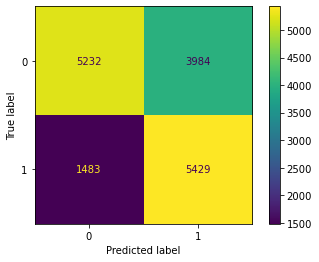

In [114]:
plot_confusion_matrix(lr, X_test, y_test);

Logistic Regression
- StandardScaler
- Default params
- SMOTE for imbalanced data
- Binary target

In [92]:
X_train, X_test, y_train, y_test = redefine_variables(df, SMOTE(sampling_strategy = 0.8))

In [93]:
lr = LogisticRegression(max_iter = 1000)

In [94]:
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [95]:
y_pred = lr.predict(X_test)

In [96]:
classification_eval(y_test, y_pred)

accuracy  = 0.684
precision = 0.612
recall    = 0.795
f1-score  = 0.691
roc auc   = 0.695
null accuracy = 0.56


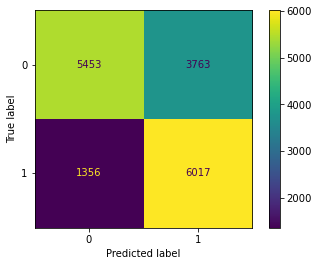

In [78]:
plot_confusion_matrix(lr, X_test, y_test);

Logistic Regression
- StandardScaler
- Default params
- ADASYN for imbalanced data
- Binary target

In [146]:
X_train, X_test, y_train, y_test = redefine_variables(df, ADASYN(sampling_strategy = 0.8))

In [147]:
lr = LogisticRegression(max_iter = 1000)

In [148]:
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [149]:
y_pred = lr.predict(X_test)

In [150]:
classification_eval(y_test, y_pred)

accuracy  = 0.685
precision = 0.618
recall    = 0.764
f1-score  = 0.684
roc auc   = 0.693
null accuracy = 0.55


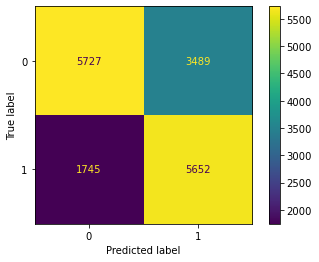

In [151]:
plot_confusion_matrix(lr, X_test, y_test);

RandomForestClassifier
- ADASYN
- StandardScaler
- Default params
- Binary target
- **Highest performing model**

In [197]:
X_train, X_test, y_train, y_test = redefine_variables(df, ADASYN(sampling_strategy = 0.8))

In [198]:
rf = RandomForestClassifier()

In [199]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [200]:
y_pred = rf.predict(X_test)

In [201]:
classification_eval(y_test, y_pred)

accuracy  = 0.992
precision = 0.993
recall    = 0.989
f1-score  = 0.991
roc auc   = 0.992
null accuracy = 0.55


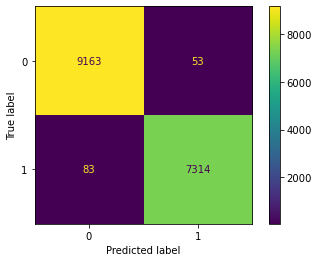

In [202]:
plot_confusion_matrix(rf, X_test, y_test);

HistGradientBoostingClassifier
- ADASYN
- StandardScaler
- Default params
- Binary target

In [191]:
X_train, X_test, y_train, y_test = redefine_variables(df, ADASYN(sampling_strategy = 0.75))

In [192]:
hgb = HistGradientBoostingClassifier()

In [193]:
hgb.fit(X_train, y_train)

HistGradientBoostingClassifier()

In [194]:
y_pred = hgb.predict(X_test)

In [195]:
classification_eval(y_test, y_pred)

accuracy  = 0.968
precision = 0.977
recall    = 0.949
f1-score  = 0.963
roc auc   = 0.966
null accuracy = 0.57


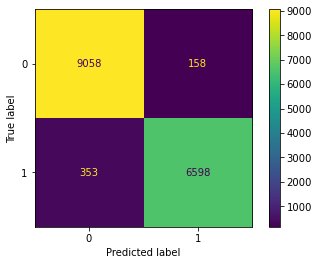

In [196]:
plot_confusion_matrix(hgb, X_test, y_test);

Tensorflow NN
- ADASYN
- StandardScaler
- Binary target

In [191]:
X_train, X_test, y_train, y_test = redefine_variables(df, ADASYN(sampling_strategy = 0.75))

# Model Tuning

In [219]:
# sampling strategy tuned manually
# proceeding with best strategy to limit model run-time
X_train, X_test, y_train, y_test = redefine_variables(df, ADASYN(sampling_strategy = 0.8))

In [205]:
rf = RandomForestClassifier()

In [220]:
params = {
    #'randomforestclassifier__n_estimators' : [1000],
    #'randomoversampler__sampling_strategy' : [0.5, 0.6, 0.7, 0.8, 0.9, 1],
    'n_estimators' : [200, 1000],
    'criterion'    : ['gini', 'entropy'],
    'oob_score'    : [True, False]
}

In [223]:
grid = GridSearchCV(rf, params)

In [224]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [200, 1000],
                         'oob_score': [True, False]})

In [225]:
y_pred = grid.predict(X_test)

In [226]:
classification_eval(y_test, y_pred)

accuracy  = 0.992
precision = 0.993
recall    = 0.989
f1-score  = 0.991
roc auc   = 0.992
null accuracy = 0.55


In [227]:
grid.best_params_

{'criterion': 'entropy', 'n_estimators': 1000, 'oob_score': True}

In [228]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_n_estimators,param_oob_score,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,7.926317,0.160136,0.204864,0.011524,gini,200,True,"{'criterion': 'gini', 'n_estimators': 200, 'oo...",0.991774,0.991774,0.991974,0.990569,0.992275,0.991673,0.000582,8
1,7.190899,0.052192,0.201915,0.007119,gini,200,False,"{'criterion': 'gini', 'n_estimators': 200, 'oo...",0.991673,0.992075,0.991874,0.991673,0.992174,0.991894,0.000205,7
2,38.943526,0.238661,0.973983,0.006231,gini,1000,True,"{'criterion': 'gini', 'n_estimators': 1000, 'o...",0.991874,0.991774,0.992175,0.991171,0.992575,0.991914,0.000465,6
3,37.724010,0.680214,1.053007,0.038529,gini,1000,False,"{'criterion': 'gini', 'n_estimators': 1000, 'o...",0.991874,0.992376,0.991874,0.991271,0.992676,0.992014,0.000482,5
4,9.510668,0.033108,0.199156,0.002374,entropy,200,True,"{'criterion': 'entropy', 'n_estimators': 200, ...",0.991573,0.992376,0.991974,0.992475,0.992776,0.992235,0.000419,2
5,8.969661,0.111015,0.200241,0.003340,entropy,200,False,"{'criterion': 'entropy', 'n_estimators': 200, ...",0.991974,0.992476,0.992075,0.992275,0.992275,0.992215,0.000175,3
6,47.546663,0.176495,0.988019,0.007811,entropy,1000,True,"{'criterion': 'entropy', 'n_estimators': 1000,...",0.991673,0.992376,0.992175,0.992375,0.992676,0.992255,0.000332,1
7,44.595079,0.257865,0.990300,0.005094,entropy,1000,False,"{'criterion': 'entropy', 'n_estimators': 1000,...",0.991673,0.992376,0.991974,0.991673,0.992575,0.992054,0.000367,4


# Final Model

In [229]:
def donor_predict_classification (df, model, imblearn_tool):
    """
    Takes in dataframe of features and target,
    creates x and y variables, scales features, 
    balances target, fits a classification model,
    and return metrics.
    
    Args: dataframe, model, imblearn over-sampling tool
    
    Returns: trained model, X_train, X_test, y_train, y_test, y_pred
    """
    # define variables
    X = df.drop(columns = ['cand_id', 'rolling_avg', '20k_donor'])
    y = df['20k_donor']
    # scale features 
    X_scaled = StandardScaler().fit_transform(X)
    # oversampling technique
    sm = imblearn_tool
    X, y = sm.fit_resample(X, y)
    # split
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                stratify = y, random_state = 22)
    # instantiate and fit, then predict
    model = model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # print metrics
    print(f'accuracy  = {np.round(accuracy_score(y_test, y_pred), 3)}')
    print(f'precision = {np.round(precision_score(y_test, y_pred), 3)}')
    print(f'recall    = {np.round(recall_score(y_test, y_pred), 3)}')
    print(f'f1-score  = {np.round(f1_score(y_test, y_pred), 3)}')
    print(f'roc auc   = {np.round(roc_auc_score(y_test, y_pred), 3)}')
    print(f'{confusion_matrix(y_test, y_pred)} -> confusion matrix')
    print(f'{round(max(y_test.mean(), 1 - y_test.mean()), 2)} -> null accuracy')
          
    # return model and variables for feature extraction
    return model, X_train, X_test, y_train, y_test, y_pred

In [230]:
model, X_train, X_test, y_train, y_test, y_pred = \
                donor_predict_classification(df, RandomForestClassifier(), 
                                             ADASYN(sampling_strategy = 0.8))

accuracy  = 0.993
precision = 0.994
recall    = 0.99
f1-score  = 0.992
roc auc   = 0.992
[[9172   44]
 [  77 7320]] -> confusion matrix
0.55 -> null accuracy


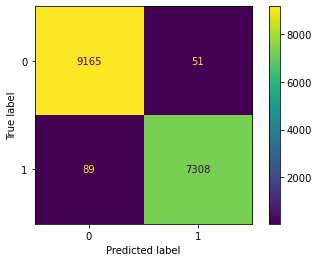

In [218]:
plot_confusion_matrix(model, X_test, y_test);